ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 2 – Construir um novo projeto de Machine Learning com os seguintes itens:
* Escolher um Dataset com o Kaggle DAtaset.
* Construir um código com python que implemente um Modelo de Machine Learning de Classificação Binária, 
* Escolha o algoritimo e faça o processo de Validação e Avaliação do Modelo de Machine Learning com Acurácia, precisão, F1 Score e Matriz de Confusão.

In [1]:
'''
DATASET UTILIZADO -> loan_data (/data/loan_data.csv)

Dataset do Kaggle, disponível em: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

Projeto realizado utilizando python 3.8.10
'''

'\nDATASET UTILIZADO -> loan_data (/data/loan_data.csv)\n\nDataset do Kaggle, disponível em: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data\n\nProjeto realizado utilizando python 3.8.10\n'

In [2]:
# Conjunto de Importações
import pandas as pd
import numpy as np

In [3]:
dados = pd.read_csv("data/loan_data.csv")           # Leitura do .csv
dados.head()                                        # Visualização do cabeçalho do .csv

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# MAPEAMENTOS DOS DADOS PARA NUMÉRICOS
dados['person_gender'], bank_mapping = pd.factorize(dados['person_gender'])
dados['person_education'], bank_mapping = pd.factorize(dados['person_education'])
dados['person_home_ownership'], bank_mapping = pd.factorize(dados['person_home_ownership'])
dados['loan_intent'], bank_mapping = pd.factorize(dados['loan_intent'])
dados['previous_loan_defaults_on_file'], bank_mapping = pd.factorize(dados['previous_loan_defaults_on_file'])

# Dropando NAN'S após transformação
dados = dados.dropna(subset=['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status'])

dados.head()            # representação toda numérica

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,0,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,0,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1


*NORMALIZANDO OS DADOS*

In [5]:
from sklearn.preprocessing import MinMaxScaler              # import do sklearn para usar MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0,1))            # instância do MinMaxScaler para criação de um normalizador

In [6]:
# NORMALIZAÇÃO DOS DADOS
colunas_para_normalizar = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'credit_score']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

dados.head()            # colunas após normalização

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0.016129,0,0,0.008891,0,0,1.000000,0,0.727023,0.49,3.0,0.371739,0,1
1,0.008065,0,1,0.000595,0,1,0.014493,1,0.392318,0.08,2.0,0.247826,1,0
2,0.040323,0,1,0.000617,3,2,0.144928,2,0.510974,0.44,3.0,0.532609,0,1
3,0.024194,0,2,0.009976,0,0,1.000000,2,0.672840,0.44,2.0,0.619565,0,1
4,0.032258,1,0,0.008082,1,0,1.000000,2,0.606996,0.53,4.0,0.426087,0,1


*Separando a base de dados em amostras de treino e teste*

In [7]:
from sklearn.model_selection import train_test_split            # import do "train_test_split" do sklearn para realizar o treinamento

In [8]:
X = dados.drop(['loan_status'], axis=1).values          # Separando todas as colunas menos "loan_status" (coluna alvo)
Y = dados['loan_status'].values                         # Variável alvo

In [9]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

*Aplicando o modelo Random Forest Classifier*

In [10]:
from sklearn.ensemble import RandomForestClassifier                                 # import do RandomForestClassifier()
modelo_RL_bank = RandomForestClassifier(class_weight='balanced', random_state=42)   # utilização do RandomForestClassifier

In [11]:
modelo_RL_bank.fit(X_treino, Y_treino)          # treinamento do modelo

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
Y_previsto = modelo_RL_bank.predict(X_teste)            # Realizando previsões na amostra de teste

*RESULTADOS (Acurácia, precisão, F1 Score e Matriz de Confusão)*

In [13]:
# Conjuntos de importações de métricas
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns           # Confusion Matrix (heatmap)

In [14]:
# Acurácia                                              -> 93%
accuracy = accuracy_score(Y_teste, Y_previsto)
print(f"ACCURACY: {accuracy:.2f}")

ACCURACY: 0.93


In [15]:
# Precisão                                              -> 90%
precision = precision_score(Y_teste, Y_previsto)
print(f"Precision = {precision:.2f}")

Precision = 0.90


In [16]:
# F1-Score                                              -> 82%
f1_score = f1_score(Y_teste, Y_previsto)
print(f"F1-SCORE: {f1_score:.2f}")

F1-SCORE: 0.82


In [17]:
# Matriz de Confusão (console)
conf_matrix = confusion_matrix(Y_teste, Y_previsto)
print(conf_matrix)

[[10269   264]
 [  701  2266]]


<Axes: >

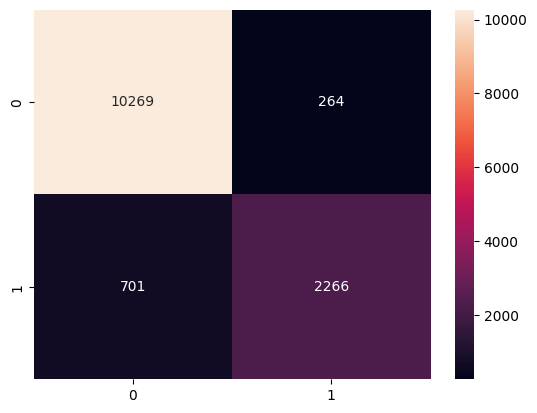

In [18]:
# Plottagem da matriz de Confusão
cm=confusion_matrix(Y_teste,Y_previsto)
sns.heatmap(cm,annot=True, fmt="d")

### RESULTADOS FINAIS:
- Acurácia -> 93%
- Precisão -> 90%
- F1-Score -> 82%
- Matriz de Confusão -> Valores acima